In [59]:
import pandas as pd

train_data = pd.read_csv("./data/train.csv", encoding = 'UTF-8')
test_data = pd.read_csv("./data/test.csv", encoding='UTF-8')

#데이터 확인
#print(train_data.head())
#print(test_data.head())

# 변수명 id 제외
train_data = train_data.drop('id', axis=1)
test_data = test_data.drop('id', axis=1)

In [60]:
# 데이터 컬럼(속성명) 이름 변경 : 데이터 컬럼을 쉽게 다루기 위해서
train_data.columns =['species','island','clutch_completion','culmen_length_mm',
                    'culmen_depth_mm','flipper_length_mm','sex','delta_15N','delta_13C','body_mass']

test_data.columns = ['species','island','clutch_completion','culmen_length_mm',
                    'culmen_depth_mm','flipper_length_mm','sex','delta_15N','delta_13C']


In [61]:
# train, test 데이터 결측치 확인
print("train 데이터 결측치 확인 \n", train_data.isnull().sum())
print("\n train 데이터 결측치 확인 \n", test_data.isnull().sum())

# 결측치 확인 함수 만들기
def check_missing_col(dataframe) :
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns) :
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >=1 else False
        if is_missing :
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은 : {col}입니다.')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train_data)

train 데이터 결측치 확인 
 species              0
island               0
clutch_completion    0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
sex                  3
delta_15N            3
delta_13C            3
body_mass            0
dtype: int64

 train 데이터 결측치 확인 
 species              0
island               0
clutch_completion    0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
sex                  6
delta_15N            9
delta_13C            8
dtype: int64
결측치가 있는 컬럼은 : sex입니다.
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은 : delta_15N입니다.
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은 : delta_13C입니다.
해당 컬럼에 총 3개의 결측치가 존재합니다.


In [62]:
#결측치가 있는 train data 행 확인
train_data[train_data.isna().sum(axis=1)>0]

,species,island,clutch_completion,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex,delta_15N,delta_13C,body_mass
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


In [63]:
# 결측치 처리 함수 범주형은 해당 행 삭제, 수치형은 평균 대체
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O' : #관측치가 범주형일 경우 해당 행 삭제
            temp = temp.dropna(subset=[col])
        elif dtype == int or dtype == float:
            temp.loc[:,col] = temp[col].fillna(temp[col].mean())
    return temp

train_data = handle_na(train_data, missing_col)

#결측 처리 확인
missing_col = check_missing_col(train_data)

결측치가 존재하지 않습니다


In [66]:
# 기초 통계량 확인
print(train_data.describe())

# 데이터 타입 확인
print(train_data.dtypes)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm   delta_15N  \
count        111.000000       111.000000         111.000000  111.000000   
mean          44.717117        17.000000         203.162162    8.738543   
std            5.290899         1.925192          14.731253    0.564470   
min           33.500000        13.200000         174.000000    7.632200   
25%           40.450000        15.250000         190.000000    8.274020   
50%           45.200000        17.200000         199.000000    8.634880   
75%           49.150000        18.600000         216.000000    9.264635   
max           55.100000        21.100000         231.000000   10.025440   

        delta_13C    body_mass  
count  111.000000   111.000000  
mean   -25.718804  4333.333333  
std      0.851332   787.518639  
min    -27.018540  2700.000000  
25%    -26.408475  3675.000000  
50%    -25.898340  4250.000000  
75%    -25.005945  4875.000000  
max    -24.102550  6300.000000  
species               objec

In [74]:
# 수치형 관측치와 범주형 관측치로 분리
num_feature = train_data.columns[(train_data.dtypes==int) | (train_data.dtypes==float)]
cate_feature = train_data.columns[train_data.dtypes=='O']

print("수치형 데이터 : ", list(num_feature))
print("범주형 데이터 : ", list(cate_feature))

수치형 데이터 :  ['culmen_length_mm', 'culmen_depth_mm', 'delta_15N', 'delta_13C']
범주형 데이터 :  ['species', 'island', 'clutch_completion', 'sex']


array([[<AxesSubplot:title={'center':'culmen_length_mm'}>,
        <AxesSubplot:title={'center':'culmen_depth_mm'}>],
       [<AxesSubplot:title={'center':'flipper_length_mm'}>,
        <AxesSubplot:title={'center':'delta_15N'}>],
       [<AxesSubplot:title={'center':'delta_13C'}>,
        <AxesSubplot:title={'center':'body_mass'}>]], dtype=object)

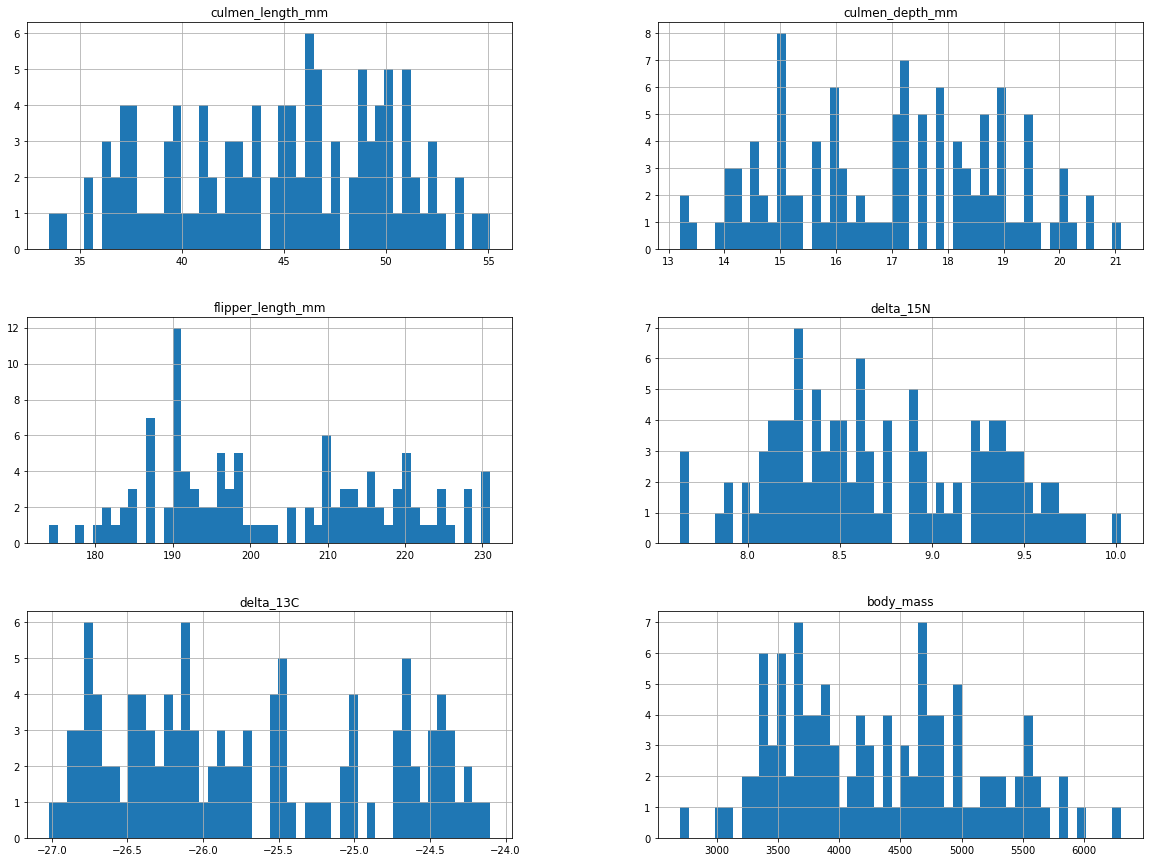

In [76]:
#데이터 히스토리 작성
train_data.hist(bins=50, figsize=(20,15))

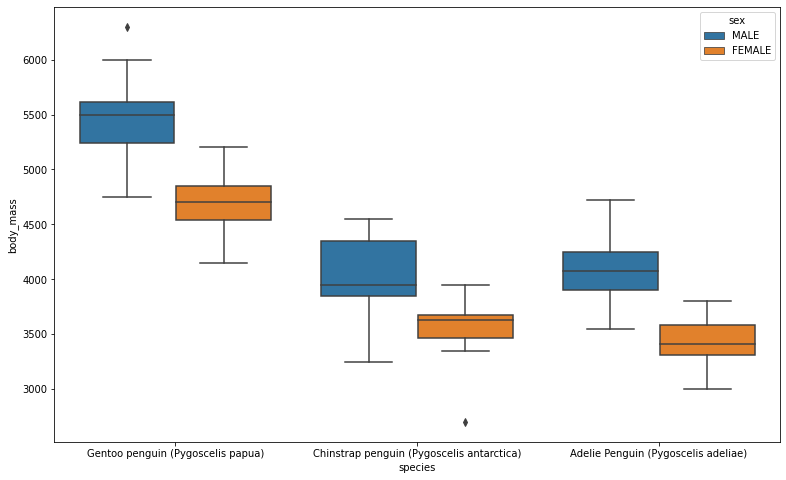

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# 종별 - 성별 box plot
plt.rcParams['figure.figsize'] = [13,8]
sns.boxplot(x='species', y='body_mass', hue = 'sex', data=train_data)
plt.show()

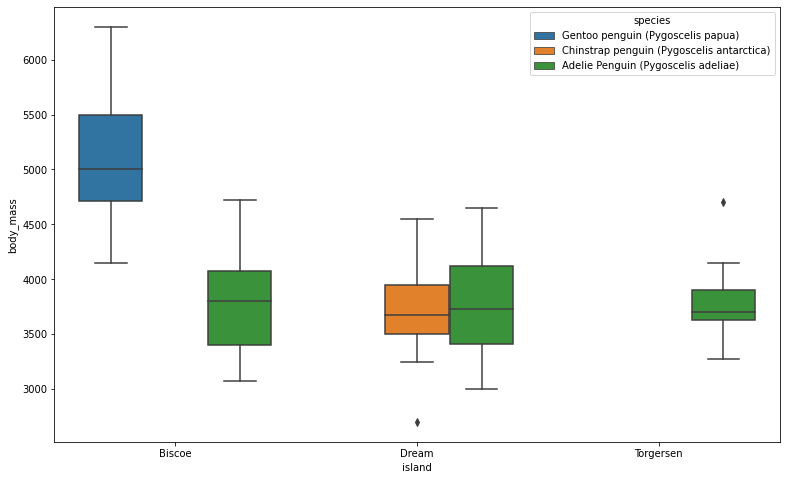

In [101]:
# island box plot

sns.boxplot(x='island', y='body_mass', hue='species', data=train_data)
plt.show()

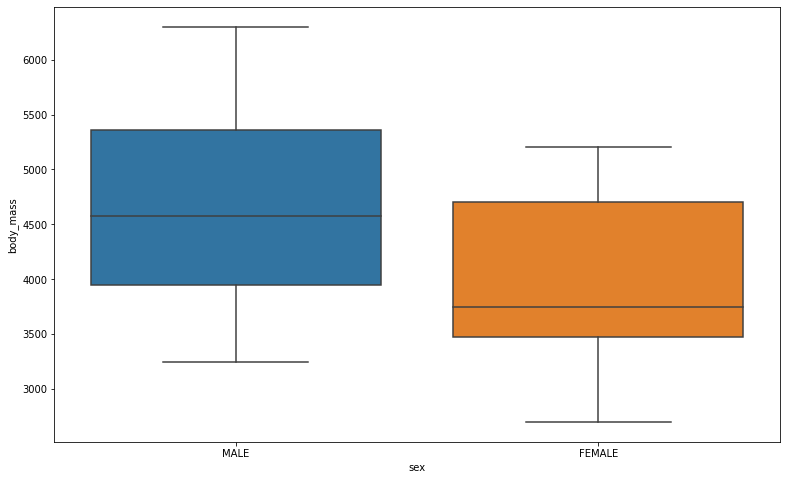

In [104]:
# sex - body_mass boxplot 
sns.boxplot(x='sex', y='body_mass',data=train_data)
plt.show()

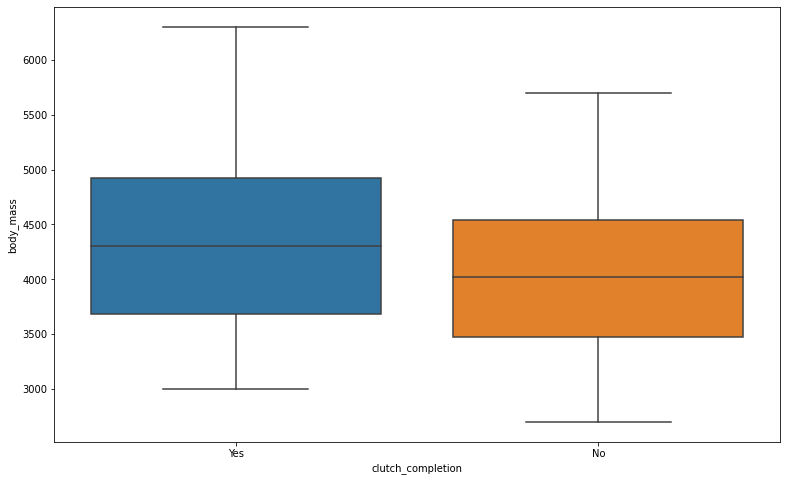

In [105]:
# clutch - body_mass boxploy
sns.boxplot(x="clutch_completion" , y = "body_mass", data=train_data)
plt.show()

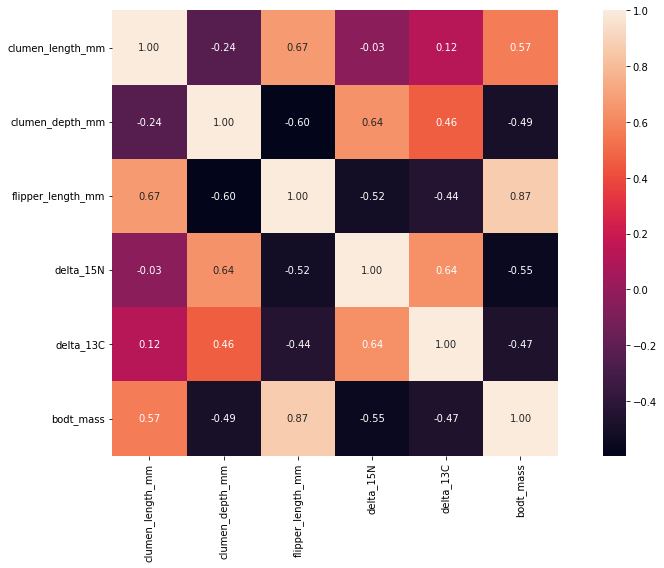

In [116]:
#상관분석 히트맵
corr = train_data.corr()
hm = sns.heatmap(corr.values,
               cbar = True, annot=True, square=True, fmt='.2f',
               yticklabels=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','delta_15N','delta_13C','bodt_mass'],
               xticklabels=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','delta_15N','delta_13C','bodt_mass'])
plt.tight_layout()
plt.show()

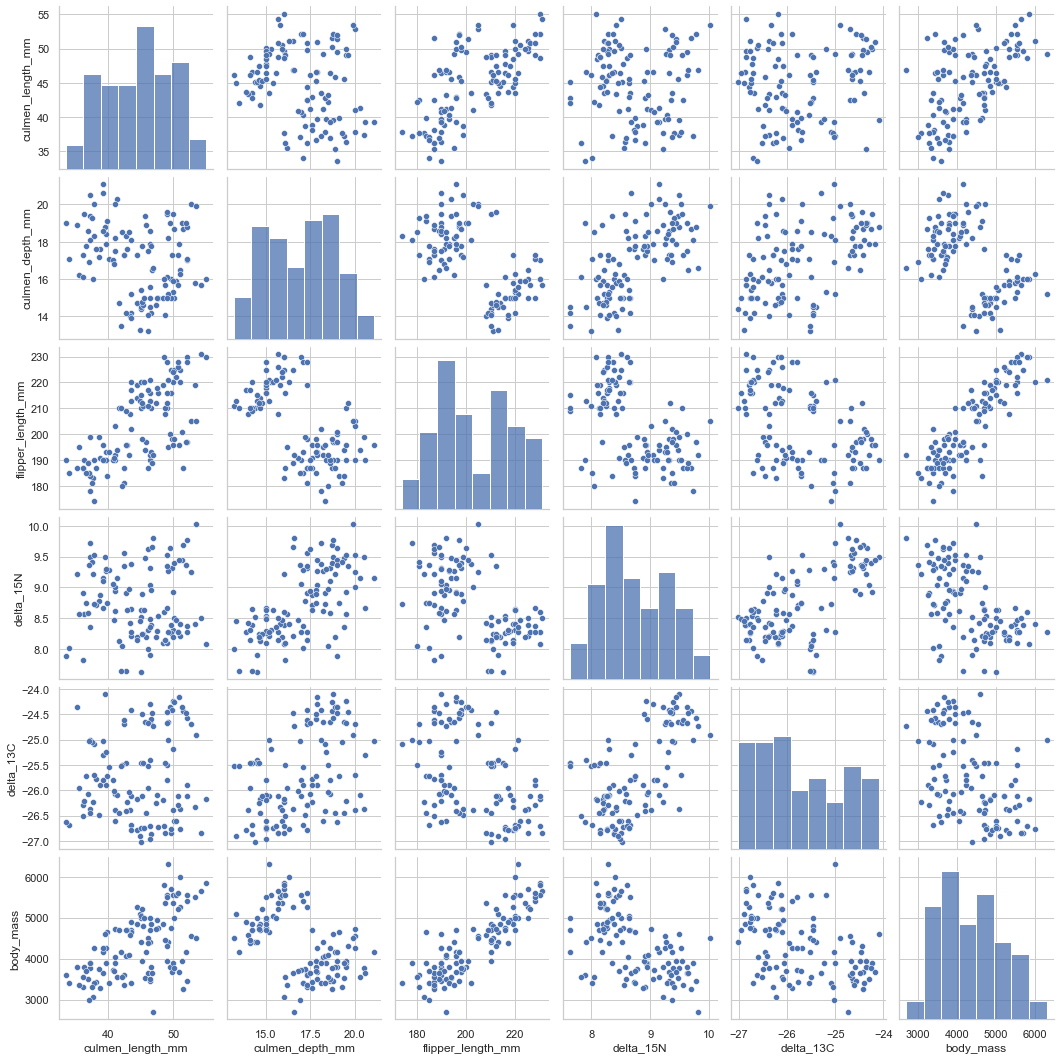

In [119]:
# 상관분석 산점도 확인
sns.set(style='whitegrid')
sns.pairplot(train_data[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','delta_15N','delta_13C','body_mass']])
plt.show()